## Titanic - Case Study

### Problem Statement:

#### The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

In [24]:
#Loading the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('titanic_train.csv')


data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
data.shape

(891, 12)

We have 891 rows and 12 columns in the dataset.

In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have continuous and categorical data in the dataset.

### Features

1. PassengerID - to indicating place of data in rows and used as a means of identification.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name of the passenger
4. Sex - Gender of the passenger
5. Age - Age of the passenger
6. SibSp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare (British pound)
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Target

survival - Survival (0 = No; 1 = Yes)

### We have to predict the survival of an arbitrary passenger on Titanic would survive the sinking or not based on above features.

### Checking for Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


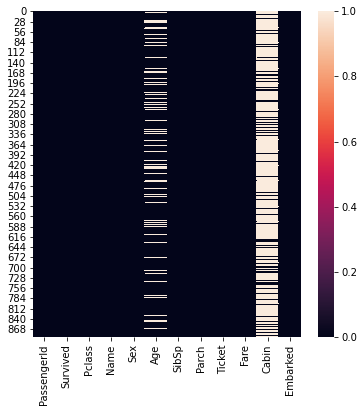

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[6,6])
sns.heatmap(data.isnull())
print(data.isnull().sum())

There are missing values in the column ['Age','Cabin','Embarked']

- NaN Values
1. Age - 177
2. Cabin - 687
3. Embarked - 2

Here the column 'Age' is having integer data and columns ['Cabin','Embarked'] are having object type data. We can ignore the missing values in column 'Cabin' as it just an identification number for cabin of each passenger.

In [29]:
#Replacing the missing values
import numpy as np

data['Age'].fillna(np.mean(data['Age']),inplace = True)
data['Age'] = data['Age'].astype('int64')
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


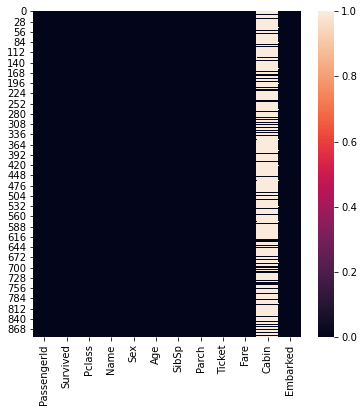

In [30]:
plt.figure(figsize=[6,6])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We have replaced the missing values in column 'Age' with the mean value of the column and replaced missing values in column 'Embarked' with the mode value of the column.

In [34]:
#Since the data is having the passengerID, we can change the default index to PassengerID.
data.set_index(data.columns[0],inplace = True) 
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S


### Encoding the categorical data

In [31]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

By observing the dataset, the columns ['PassengerId','Name','Ticket','Cabin'] are for identification of passengers which is not influencing the target column 'Survived'. 

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

We can encode the data in columns 'Sex' and 'Embarked' as they are influencing the target column.

In [37]:
data['Sex'] = enc.fit_transform(data['Sex'].values.reshape(-1,1))
data['Embarked'] = enc.fit_transform(data['Embarked'].values.reshape(-1,1))

data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1.0,22,1,0,A/5 21171,7.2500,NaN,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38,1,0,PC 17599,71.2833,C85,0.0
3,1,3,"Heikkinen, Miss. Laina",0.0,26,0,0,STON/O2. 3101282,7.9250,NaN,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35,1,0,113803,53.1000,C123,2.0
5,0,3,"Allen, Mr. William Henry",1.0,35,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1.0,27,0,0,211536,13.0000,NaN,2.0
888,1,1,"Graham, Miss. Margaret Edith",0.0,19,0,0,112053,30.0000,B42,2.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,29,1,2,W./C. 6607,23.4500,NaN,2.0


In [39]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex         float64
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked    float64
dtype: object

Now we have encoded the necessary columns for building model.

### Visualization of Data

#### Univariate Analysis

In [43]:
#We can group the columns with categorical values with low cardinality for visualization purpose.
data_visualization = data[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]

#### Countplot

0    549
1    342
Name: Survived, dtype: int64

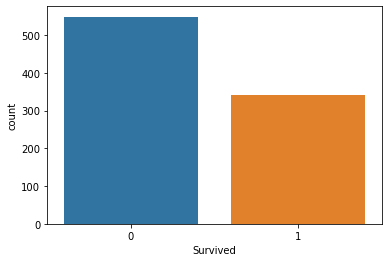

In [48]:
sns.countplot(data_visualization['Survived'])
data_visualization['Survived'].value_counts()

The data provided in the dataset is for passangers in which 549 didn't survive and 342 got survived after the ship got sank. 

3    491
1    216
2    184
Name: Pclass, dtype: int64

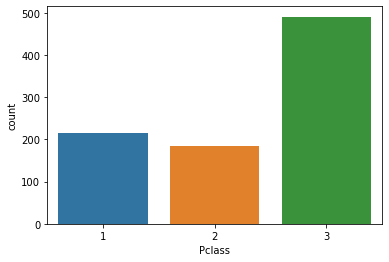

In [49]:
sns.countplot(data_visualization['Pclass'])
data_visualization['Pclass'].value_counts()

From the above observations, the data for passengers from class 3 is provided most - 491, number of passangers from class 1 is 216 and number of passengers from class 2 is 184.

1.0    577
0.0    314
Name: Sex, dtype: int64

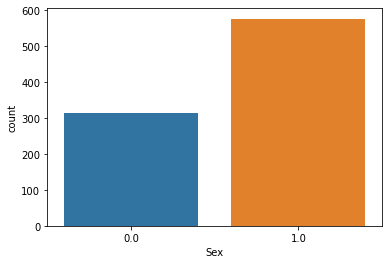

In [50]:
sns.countplot(data_visualization['Sex'])
data_visualization['Sex'].value_counts()

From the above observation, most of the passengers were males - 577. The number of female passangers in the ship was 314.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

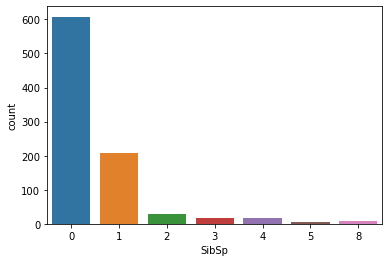

In [51]:
sns.countplot(data_visualization['SibSp'])
data_visualization['SibSp'].value_counts()

1. From the above observations, most of the passengers were travelling without their siblings or spouse - 608.
2. Passengers who were travelling with 5 siblings and/or spouse were least in the ship.

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

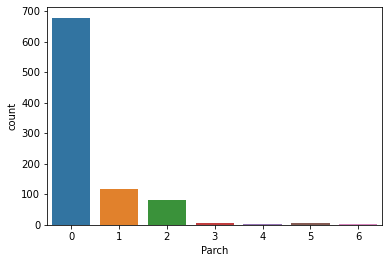

In [54]:
sns.countplot(data_visualization['Parch'])
data_visualization['Parch'].value_counts()

1. Most of the passengers were travelling without their parents or children on ship.
2. Only one passenger was travelling with 6 children and/or parents on ship.

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64

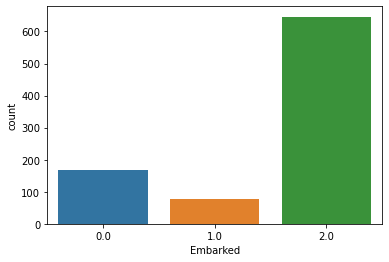

In [53]:
sns.countplot(data_visualization['Embarked'])
data_visualization['Embarked'].value_counts()

1. Most of the passengers on ship were embarked from Southampton. - 646.
2. Least number of passengers were onboarded from Queenstown. - 77.

<AxesSubplot:xlabel='Age', ylabel='Count'>

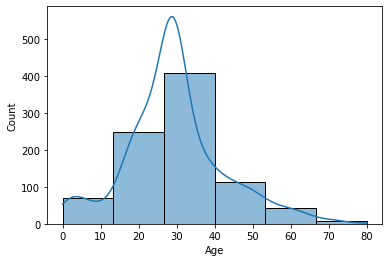

In [58]:
#Visualization of categorical data with high cardinality with histogram plot
sns.histplot(data['Age'], bins = 6, kde = True)

From the above observations, most of the passengers on ship were between the age 20 and 40.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

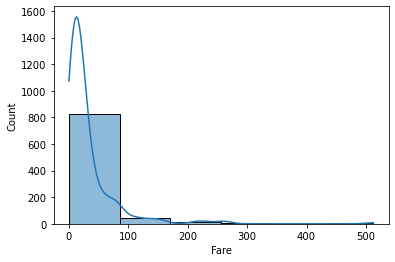

In [76]:
#Visualization of column with continuous data - Fare
sns.histplot(data['Fare'], bins = 6, kde = True)

Most of the passengers were travelling with tickets of less than 100 pounds.

#### Bivariate analysis

In [60]:
#Now we can check the relation of independent variables with the target column(dependent variable)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

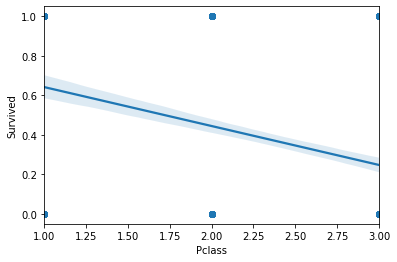

In [63]:
sns.regplot(data_visualization['Pclass'],data_visualization['Survived'])

From the above observation, the relation wtih the column 'Pclass' and the target column is negative. That means the passengers belonging to the class 2 and 3 are having low survival rate compared to passengers who travelled in class 1.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

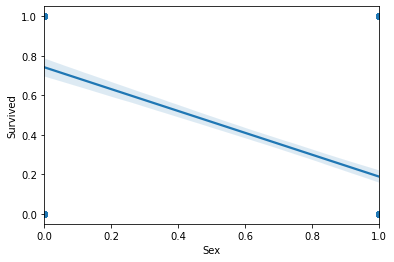

In [66]:
sns.regplot(data_visualization['Sex'],data_visualization['Survived'])

From the above observations, the number of female survivers is higher than the number of male survivers. 

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

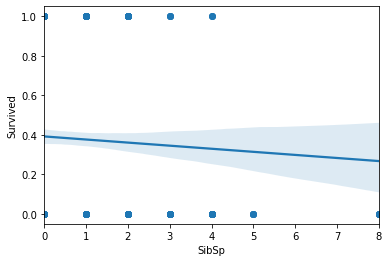

In [68]:
sns.regplot(data_visualization['SibSp'],data_visualization['Survived'])

From the above observations, the relationship with the column 'SibSp' is negative to the target column. That means the passengers with more siblings and/or spouse onboard the ship were having low survival rate than the passengers who were travelling without spouses or siblings.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

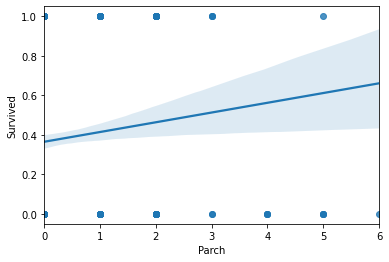

In [69]:
sns.regplot(data_visualization['Parch'],data_visualization['Survived'])

From the above observations, the column 'Parch' is showing a positive relation with the target column. That means the passengers who travelled with parents and/or children were more likely survived.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

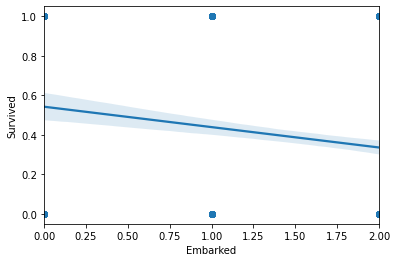

In [70]:
sns.regplot(data_visualization['Embarked'],data_visualization['Survived'])

From the above observation, the column 'Embarked' is having a negative relation with the target column.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

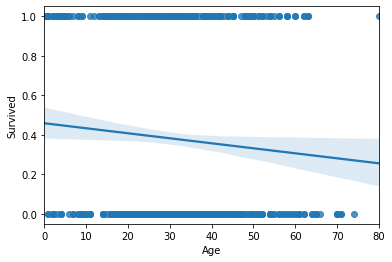

In [71]:
sns.regplot(data['Age'],data_visualization['Survived'])

From the above observation, the column 'Age' is having a negative relation with the target variable. That means as age of the passenger increases the survival rate is decreasing.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

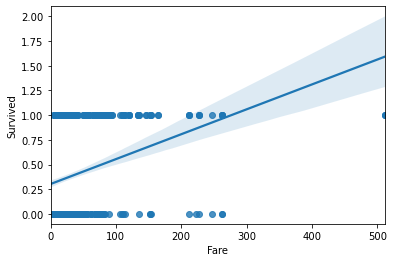

In [77]:
sns.regplot(data['Fare'],data['Survived'])

From the above observations, the column 'Fare' is positvely correlated with the Target variable. That means the passengers who bought the higher priced tickets are more likely to be in survived list.

### Statistical Summary

#### Describe of the data

In [78]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.544332,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<AxesSubplot:>

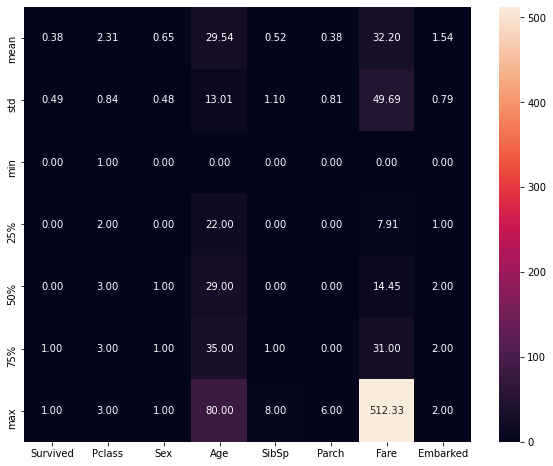

In [79]:
plt.figure(figsize=[10,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

Observations
1. The mean of data is higher than median for the columns ['Survived','Age','SibSp','Parch','Fare']. That means skewness is present in the distribution of data in these columns.
2. The difference between 75% and the Maximum value in column ['Age','Fare'] is higher. That means possible outliers are present in the data of these columns.

### Correlation

In [83]:
Correlation = data.corr()
Correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.067809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.335071,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.082533,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.067809,-0.335071,0.082533,1.000000,-0.232743,-0.176744,0.093856,-0.022928
SibSp,-0.035322,0.083081,-0.114631,-0.232743,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.176744,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.093856,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.022928,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

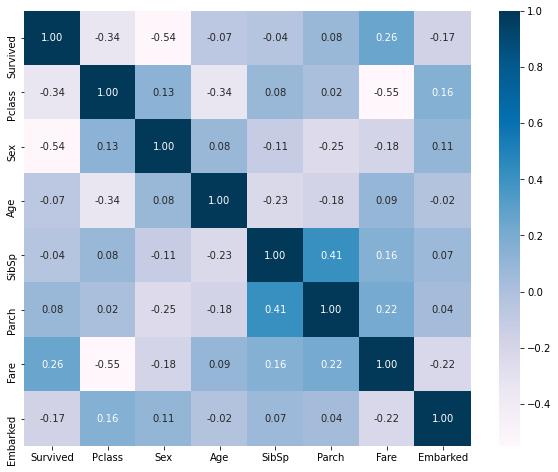

In [85]:
#Plotting the correlation of columns
plt.figure(figsize=[10,8])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='PuBu')

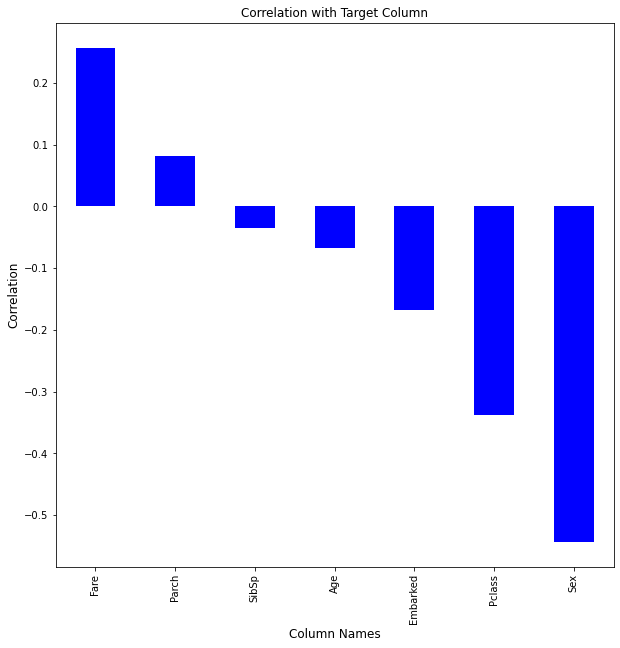

In [87]:
plt.figure(figsize = [10,10])
Correlation['Survived'].sort_values(ascending= False).drop('Survived').plot(kind = 'bar', color ='b')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

The columns ['SibSp','Age','Embarked','Pclass','Sex'] are having negative correlation with the Target variable. Only the columns ['Fare','Parch'] are having positive correlation with the target variable.

1. The column 'Fare' is having a good positive correlation bond with the Target variable - 25.7%.
2. The column 'Parch' is having a weak positive correlation bond with the Target variable - 8%.
3. The column 'SibSp' is having a weak negative correlation bond with the Target variable - -3.5%.
4. The column 'Age' is having a weak negative correlation bond with the Target variable - -7.7%.
5. The column 'Embarked' is having a good negative correlation bond with the Target variable - -16.8%.
6. The column 'Pclass' is having a strong negative correlation bond with the Target variable - -33.8%.
7. The column 'Sex' is having a strong negative correlation bond with the Target variable - -54.3%.

### Checking the data distribution among all the columns(Skewness)

In [96]:
cols = data[['Age','Fare','Survived','Pclass','Sex','SibSp','Parch','Embarked']]

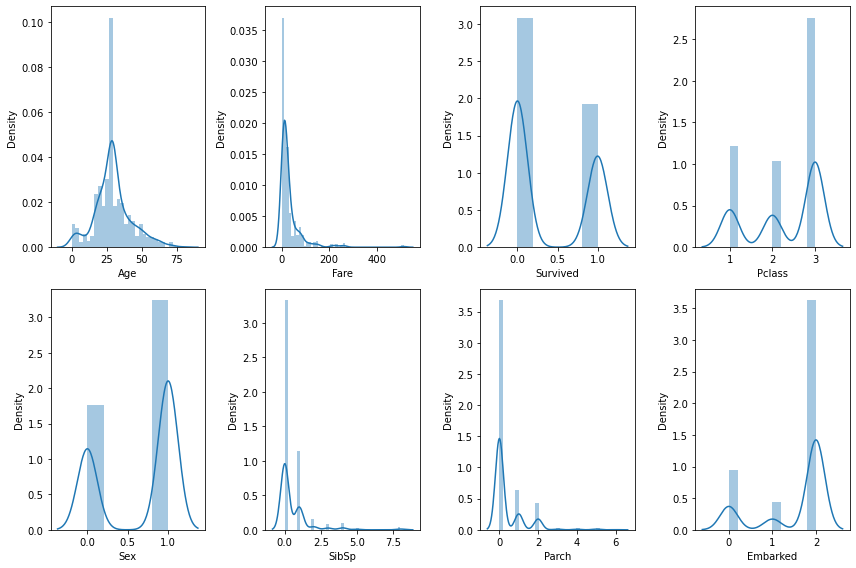

In [98]:
plt.figure(figsize = [12,8])
for i in range(0,len(cols.columns.values)):
    plt.subplot(2,4,i+1)
    sns.distplot(cols[cols.columns.values[i]])
    plt.tight_layout()

Skewness is considered for continuous data. Rest of the columns are encoded but categorical data.

In [88]:
Skewness = data.skew()
Skewness

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.459563
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

Here, the skewness is considered only for the columns 'Age' and 'Fare'. There is a large amount of skewness present in the distribution of column 'Fare'

##### Since the columns ['Name','Ticket','Cabin'] are only for identification purpose of the passenger, we can drop these columns from our dataset for further processing.

In [100]:
data.drop(['Name','Ticket','Cabin'],axis = 1, inplace = True)

In [101]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1.0,22,1,0,7.2500,2.0
2,1,1,0.0,38,1,0,71.2833,0.0
3,1,3,0.0,26,0,0,7.9250,2.0
4,1,1,0.0,35,1,0,53.1000,2.0
5,0,3,1.0,35,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
887,0,2,1.0,27,0,0,13.0000,2.0
888,1,1,0.0,19,0,0,30.0000,2.0
889,0,3,0.0,29,1,2,23.4500,2.0


### Checking the presence of outliers

In [102]:
#User defined function to plot the outlers of each columns using boxplot
def box(col):
    plt.figure(figsize =[3,6])
    sns.boxplot(y = data[col])
    plt.show()

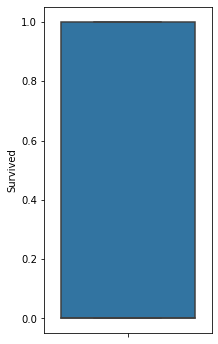

In [103]:
box('Survived')

There is no outliers present in column 'Survived'

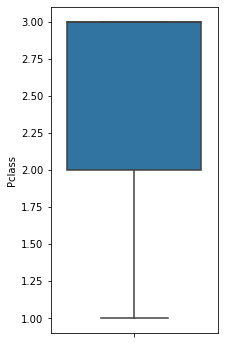

In [104]:
box('Pclass')

There are no outliers present in the data of column 'Pclass'.

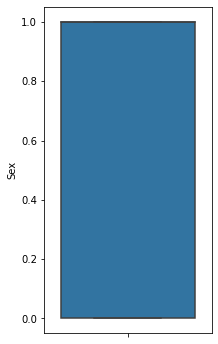

In [105]:
box('Sex')

There are no outliers in data of column 'Sex'.

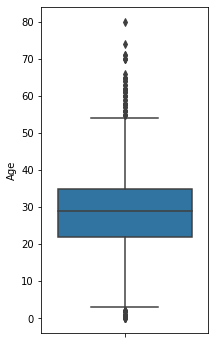

In [106]:
box('Age')

There are outliers present in the data of column 'Age'.

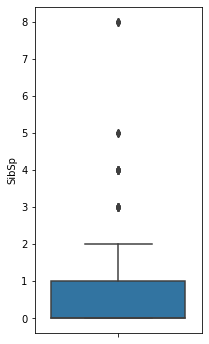

In [107]:
box('SibSp')

There are outliers present in the data of column 'SibSp'.

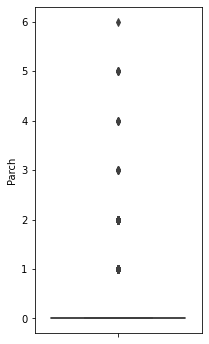

In [108]:
box('Parch')

Extreme outliers are present in data of column 'Parch'.

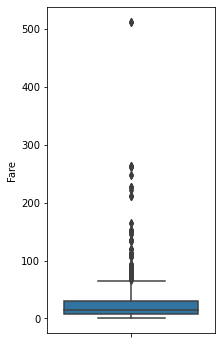

In [109]:
box('Fare')

Extreme outliers are present in data of column 'Fare'.

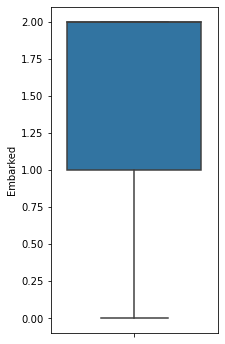

In [110]:
box('Embarked')

There are no outliers present in the data of column 'Embarked'.

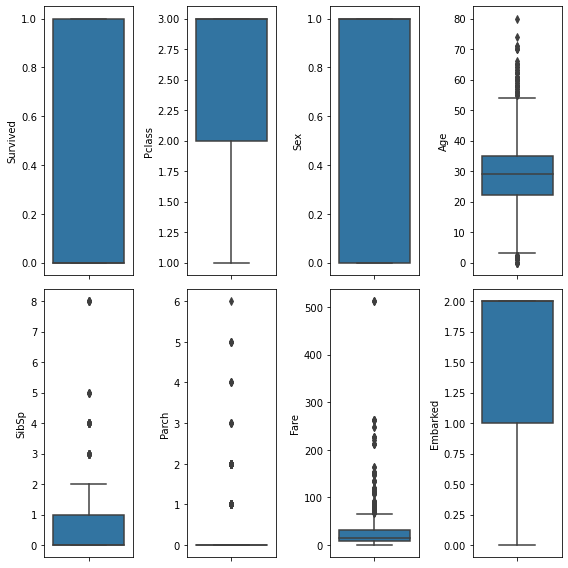

In [111]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [8,8])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

Outliers are present in data of columns ['Age','SibSp','Parch','Fare'].

### Data Cleaning

### Checking whether the data is balanced or not

In [112]:
x = data.drop('Survived',axis = 1)
y = data.Survived

In [113]:
print(x.shape)
print(y.shape)

(891, 7)
(891,)


0    549
1    342
Name: Survived, dtype: int64


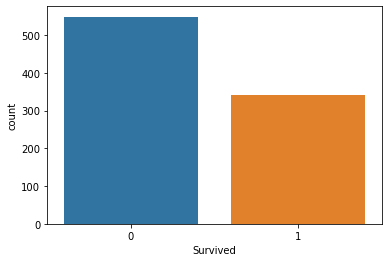

In [114]:
sns.countplot(y)
print(y.value_counts())

We can see that there is imbalance in the data where the data of people survived is less in the dataset. We can handle the imbalance of this dataset

In [115]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrainw, ytrainw = sm.fit_resample(x,y)
ytrainw

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: Survived, Length: 1098, dtype: int64

0    549
1    549
Name: Survived, dtype: int64


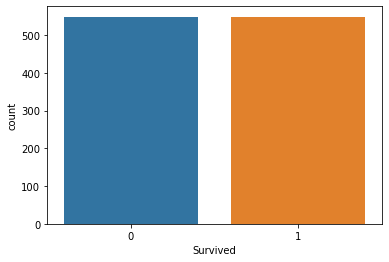

In [116]:
sns.countplot(ytrainw)
print(ytrainw.value_counts())

In [117]:
print(xtrainw.shape)
print(ytrainw.shape)

(1098, 7)
(1098,)


Now the data is balanced with equal distribution of data for Survived and passengers didn't survive.

### Removing the Skewness

#### Splitting the data before removing skewness

In [118]:
x = xtrainw.copy()
y = ytrainw.copy()

In [119]:
print(x.shape)
print(y.shape)

(1098, 7)
(1098,)


In [120]:
#We can set the skewness standard limit as +/-0.4.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.4]

Fare        4.632361
SibSp       3.918962
Parch       2.845407
Pclass     -0.447159
Embarked   -1.159991
dtype: float64

Here the skewness of categorical columns are ignored as it is irrelevant. The columns except 'Fare' are having categorical data. The column 'Fare' is continuous type of data and is having higher skewness. Lets remove the skewness of this column.

In [121]:
from sklearn.preprocessing import power_transform
x['Fare'] = power_transform(x['Fare'].values.reshape(-1,1))

In [122]:
x.skew()

Pclass     -0.447159
Sex        -0.364231
Age         0.356897
SibSp       3.918962
Parch       2.845407
Fare       -0.040555
Embarked   -1.159991
dtype: float64

The skewness of the columns with continuous type of data have been removed. 

### Removing the Outliers

In [123]:
from scipy.stats import zscore
df = x.copy()
df['Survived'] = y.copy()
z = np.abs(zscore(df))
z

array([[0.90405524, 0.85341933, 0.57167909, ..., 0.95377813, 0.62940775,
        1.        ],
       [1.42611531, 1.22939219, 0.65715466, ..., 1.25557447, 1.91225164,
        1.        ],
       [0.90405524, 1.22939219, 0.26447065, ..., 0.86394531, 0.62940775,
        1.        ],
       ...,
       [1.42611531, 1.22939219, 1.80918631, ..., 1.00118664, 0.08456042,
        1.        ],
       [0.90405524, 1.22939219, 0.03406432, ..., 0.88710404, 0.64142195,
        1.        ],
       [0.90405524, 1.22939219, 0.03406432, ..., 0.18872835, 0.64142195,
        1.        ]])

In [124]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1.000000,22,1,0,-0.953778,2.000000,0
1,1,0.000000,38,1,0,1.255574,0.000000,1
2,3,0.000000,26,0,0,-0.863945,2.000000,1
3,1,0.000000,35,1,0,0.990881,2.000000,1
4,3,1.000000,35,0,0,-0.848141,2.000000,0
...,...,...,...,...,...,...,...,...
1093,1,0.804718,48,1,0,1.040432,0.390565,1
1094,1,1.000000,25,1,0,1.020865,0.480687,1
1095,1,0.000000,53,1,0,1.001187,1.438187,1
1096,3,0.000000,29,0,0,-0.887104,1.000000,1


In [125]:
df.shape

(1098, 8)

In [126]:
df_new.shape

(1031, 8)

In [127]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

6.10200364298725

We are losing only 6.1% of data after removing the outliers. 

### Checking the Multicolinearity of variables in the dataframe

In [128]:
x = df_new.drop('Survived',axis = 1)
y = df_new['Survived']

print(x.shape)
print(y.shape)

(1031, 7)
(1031,)


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [130]:
calc_vif(x)

,Column Name,VIF Factor
0,Pclass,9.119083
1,Sex,2.680905
2,Age,5.604772
3,SibSp,1.709716
4,Parch,1.648939
5,Fare,2.575164
6,Embarked,4.334962


The variance of inflation for all the columns are comparatively low. So the multicolinearity is low for all the columns in the data.

In [131]:
#Steps performed till now.
#1.Loaded data
#2. Observed the type of data, features and target of dataset, shape of the dataset(rows and columns).
#3. Checked for missing values
#4. Set the first column 'PassengerId' as index of the dataset.
#5. Encoded the categorical columns which are relevant for model building.
#6 Visualization of data
    #Univariate analysis - Using countplot and histogram plot
    #Bivariate analysis(with target column) - Using regression plot.
#Statistical Summary
#7. Describe of the data
#8. Correlation of the data
#9. Checked the data distribution among all the columns(Skewness).
#10. Dropped columns which are used only for identification purpose of the passengers. Columns = ['Name','Ticket','Cabin'].
#11. Checked the presence of outliers.
#Data Cleansing
#12. Checked and removed imbalance of data.
#13. Removed skewness present in data.
#14. Removed outliers present in the data.
#15. Checked for multicolinearity of the columns.

### EDA Completed

### Model Building

### Splitting the data into features and target

In [132]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(1031, 7)
(1031,)


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [359]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
estimator = [('LR', LogisticRegression()),
             ('KNN',KNeighborsClassifier()),
             ('SVR', SVC(gamma='auto')),
             ('DTC',DecisionTreeClassifier()),
             ('RFC',RandomForestClassifier(n_estimators=100))]
vtc = VotingClassifier(estimators = estimator)

#### Finding the best random_state

In [139]:
#User defined function for finding the best random state
def best_ran(model):
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

#### Testing the model with best random state

In [357]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    print(confusion_matrix(target_test,pred_test))
    print(classification_report(target_test,pred_test))

#### LogisticRegression

In [322]:
best_ran(lr)

LogisticRegression()
At random state  57 the model is having accuracy score of  0.8454106280193237


In [323]:
mod_test(lr,57)

LogisticRegression()
Accuracy Score is  0.8454106280193237
[[84 20]
 [12 91]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       104
           1       0.82      0.88      0.85       103

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



#### KNeighborsClassifier

In [143]:
best_ran(knn)

KNeighborsClassifier()
At random state  31 the model is having accuracy score of  0.8405797101449275


In [325]:
mod_test(knn,31)

KNeighborsClassifier()
Accuracy Score is  0.8405797101449275
[[80 19]
 [14 94]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        99
           1       0.83      0.87      0.85       108

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



#### DecisionTreeClassifier

In [145]:
best_ran(dtc)

DecisionTreeClassifier()
At random state  94 the model is having accuracy score of  0.8647342995169082


In [366]:
mod_test(dtc,94)

DecisionTreeClassifier()
Accuracy Score is  0.8502415458937198
[[92 14]
 [17 84]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       106
           1       0.86      0.83      0.84       101

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



#### GaussianNB

In [147]:
best_ran(gnb)

GaussianNB()
At random state  72 the model is having accuracy score of  0.8260869565217391


In [339]:
mod_test(gnb,72)

GaussianNB()
Accuracy Score is  0.8260869565217391
[[ 68  24]
 [ 12 103]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        92
           1       0.81      0.90      0.85       115

    accuracy                           0.83       207
   macro avg       0.83      0.82      0.82       207
weighted avg       0.83      0.83      0.82       207



#### RandomForestClassifier

In [149]:
best_ran(rfc)

RandomForestClassifier()
At random state  57 the model is having accuracy score of  0.893719806763285


In [361]:
mod_test(rfc,57)

RandomForestClassifier()
Accuracy Score is  0.893719806763285
[[90 14]
 [ 8 95]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       104
           1       0.87      0.92      0.90       103

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.90      0.89      0.89       207



#### AdaBoostClassifier

In [150]:
best_ran(abc)

AdaBoostClassifier()
At random state  72 the model is having accuracy score of  0.855072463768116


In [345]:
mod_test(abc,72)

AdaBoostClassifier()
Accuracy Score is  0.855072463768116
[[ 73  19]
 [ 11 104]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        92
           1       0.85      0.90      0.87       115

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207



#### GradientBoostingClassifier

In [272]:
best_ran(gbc)

GradientBoostingClassifier()
At random state  96 the model is having accuracy score of  0.8840579710144928


In [347]:
mod_test(gbc,96)

GradientBoostingClassifier()
Accuracy Score is  0.8840579710144928
[[91  8]
 [16 92]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        99
           1       0.92      0.85      0.88       108

    accuracy                           0.88       207
   macro avg       0.89      0.89      0.88       207
weighted avg       0.89      0.88      0.88       207



#### VotingClassifier

In [281]:
best_ran(vtc)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
At random state  57 the model is having accuracy score of  0.8985507246376812


In [360]:
mod_test(vtc,57)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
Accuracy Score is  0.8888888888888888
[[89 15]
 [ 8 95]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       104
           1       0.86      0.92      0.89       103

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



#### SVC

In [332]:
#User defined function for finding the best random state
def best_ran_svc(model,ker):
    svc = SVC(kernel = ker,probability=True)
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

In [333]:
#User defined function for using different kernels for SVC model
def svca(ker,ran):
    svc = SVC(kernel = ker,probability=True)
    print(SVC(),ker)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    svc.fit(features_train,target_train)
    pred_svc = svc.predict(features_test)
    print(accuracy_score(target_test,pred_svc))
    print(confusion_matrix(target_test,pred_svc))
    print(classification_report(target_test,pred_svc))

##### 'rbf'

In [168]:
best_ran_svc(svc,'rbf')

SVC()
At random state  72 the model is having accuracy score of  0.7971014492753623


In [334]:
svca('rbf',72)

SVC() rbf
0.7971014492753623
[[79 13]
 [29 86]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        92
           1       0.87      0.75      0.80       115

    accuracy                           0.80       207
   macro avg       0.80      0.80      0.80       207
weighted avg       0.81      0.80      0.80       207



##### 'linear'

In [175]:
best_ran_svc(svc,'linear')

SVC()
At random state  72 the model is having accuracy score of  0.7971014492753623


In [176]:
svca('linear',72)

SVC() linear
0.7874396135265701
[[78 14]
 [30 85]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        92
           1       0.86      0.74      0.79       115

    accuracy                           0.79       207
   macro avg       0.79      0.79      0.79       207
weighted avg       0.80      0.79      0.79       207



##### 'poly'

In [177]:
best_ran_svc(svc,'poly')

SVC()
At random state  72 the model is having accuracy score of  0.7971014492753623


In [178]:
svca('poly',72)

SVC() poly
0.7584541062801933
[[61 31]
 [19 96]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        92
           1       0.76      0.83      0.79       115

    accuracy                           0.76       207
   macro avg       0.76      0.75      0.75       207
weighted avg       0.76      0.76      0.76       207



After testing the data with all the algorithms, the ensemble method RandomForestClassifer(rfc) is performing well with the prediction with an accuracy score of 89.4%. 

Now let's check the cross validation of all the models.

### Cross Validation

In [179]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [180]:
cross_val(lr, 57)

LogisticRegression()
At cv fold 2  the cv score is  0.7943911341913148 and the Accuracy Score  is  0.8454106280193237


#### KNeighborsClassifier

In [181]:
cross_val(knn,31)

KNeighborsClassifier()
At cv fold 9  the cv score is  0.7982964658021866 and the Accuracy Score  is  0.8405797101449275


#### DecisionTreeClassifier

In [182]:
cross_val(dtc,94)

DecisionTreeClassifier()
At cv fold 8  the cv score is  0.8264519743217055 and the Accuracy Score  is  0.8405797101449275


#### GaussianNB

In [183]:
cross_val(gnb,72)

GaussianNB()
At cv fold 8  the cv score is  0.7594476744186047 and the Accuracy Score  is  0.8260869565217391


#### RandomForestClassifier

In [284]:
cross_val(rfc,57)

RandomForestClassifier()
At cv fold 7  the cv score is  0.8381136238279094 and the Accuracy Score  is  0.893719806763285


#### AdaBoostClassifier

In [185]:
cross_val(abc,72)

AdaBoostClassifier()
At cv fold 6  the cv score is  0.8176707919669975 and the Accuracy Score  is  0.855072463768116


#### GradientBoostingClassifier

In [209]:
cross_val(gbc,96)

GradientBoostingClassifier()
At cv fold 4  the cv score is  0.845805809429011 and the Accuracy Score  is  0.8840579710144928


#### VotingClassifier

In [286]:
cross_val(vtc,55)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVR', SVC(gamma='auto')),
                             ('DTC', DecisionTreeClassifier()),
                             ('RFC', RandomForestClassifier())])
At cv fold 7  the cv score is  0.8400112940929267 and the Accuracy Score  is  0.8502415458937198


#### SVC

In [188]:
cross_val(svc,72)

SVC()
At cv fold 9  the cv score is  0.7227137893041783 and the Accuracy Score  is  0.7971014492753623


#### After cross validation of the models, the Random Forest Classifier (rfc) is performing well with cross validation and providing maximum accuracy score of 89.37% for a cross validation mean score of 83.8% at 7 cross validations. So we can consider the RandomForestClassifier model as best model.

In [290]:
rfc = RandomForestClassifier(n_estimators=100)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 57)
rfc.fit(features_train, target_train)
pred_test = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test))
print(confusion_matrix(target_test,pred_test))
print(classification_report(target_test,pred_test))
cv_score = cross_val_score(rfc,features, target, cv = 7)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.9033816425120773
[[92 12]
 [ 8 95]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       104
           1       0.89      0.92      0.90       103

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207

CV score is  0.833261103669267


### Hyperparameter Tuning

In [305]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,125,150],
             'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt','log2'],
             'class_weight':['balanced','balanced_subsample']}

grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid=parameters, cv = 7)

In [306]:
grid.fit(features,target)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150]})

In [307]:
grid.best_score_

0.8419943266882042

In [308]:
grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 150}

In [368]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='auto',class_weight='balanced_subsample')
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 57)
rfc.fit(features_train,target_train)
pred_rfc = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_rfc))
print(confusion_matrix(target_test,pred_rfc))
print(classification_report(target_test,pred_rfc))

Accuracy Score is  0.9033816425120773
[[92 12]
 [ 8 95]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       104
           1       0.89      0.92      0.90       103

    accuracy                           0.90       207
   macro avg       0.90      0.90      0.90       207
weighted avg       0.90      0.90      0.90       207



After hyperparameter tuning, the model is performing slightly better and providing better accuracy score.

### AUC ROC Curve

In [318]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [319]:
#User defined function for plotting AUC ROC curve for different models

def auc_roc(model):
    target_pred_prob = model.predict_proba(features_test)[:,1]
    fpr,tpr,thresholds = roc_curve(target_test,target_pred_prob)
    auc_score = roc_auc_score(target_test, model.predict(features_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

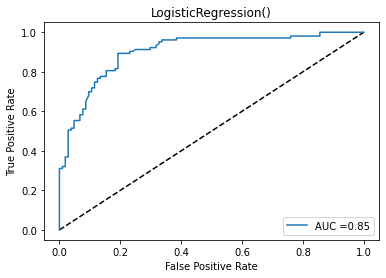

In [324]:
auc_roc(lr)

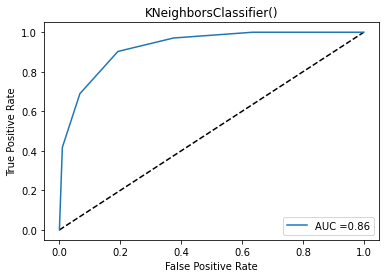

In [326]:
auc_roc(knn)

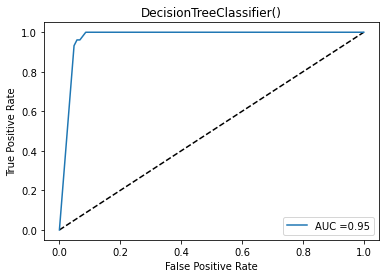

In [367]:
auc_roc(dtc)

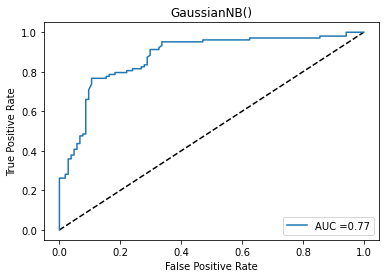

In [340]:
auc_roc(gnb)

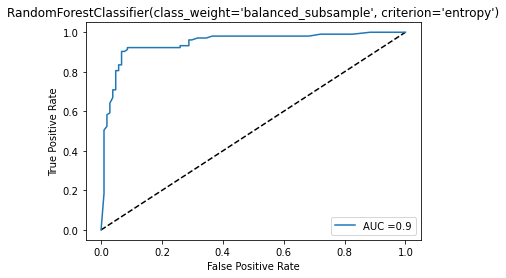

In [369]:
auc_roc(rfc)

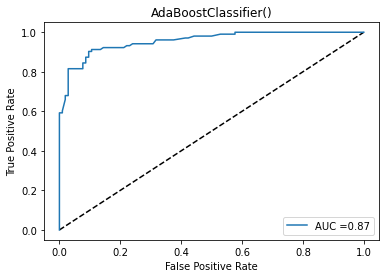

In [346]:
auc_roc(abc)

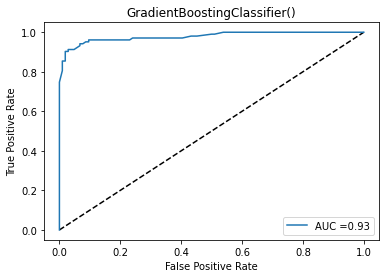

In [348]:
auc_roc(gbc)

Here, most of the models are performing good with the AUC score. For RandomForestClassifier model, the model is performing well with AUC score and with accuracy score. So we can consider it as the best mode after all these tests.

### The RandomForestClassifier(rfc) provided an accuracy score of 90.33%.

### Saving the Best Model

In [370]:
import pickle

filename = 'Survival of an aribitrary passenger on titanic prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

### Conclusion

In [373]:
original = np.array(target_test)
predicted = np.round(np.array(rfc.predict(features_test)),0)
df_prediction = pd.DataFrame({'Original':original,'Predicted':predicted})
df_prediction.sample(10)

,Original,Predicted
152,1,1
102,0,0
199,0,0
138,1,1
8,1,1
44,0,0
36,0,0
171,0,0
144,0,0
43,0,0


#### Our model is performing well with the predictions and have predicted the samples without any mistakes. 

### Succefully created the model to predict the survival of an arbitrary passenger on Titanic.